In [3]:
# import python libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:
#load dataset
credit_card=pd.read_excel("C:/Users/Aspire/Desktop/UTAR/Y3S1/FYP1/FYP1/default_of_credit_card_clients.xls")

In [5]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [6]:
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [7]:
credit_card.rename(columns={'default payment next month':'default'}, inplace=True)

In [8]:
credit_card.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [9]:
#Check the empty columns
credit_card.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [10]:
credit_card.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [11]:
#SEX
credit_card['SEX']=credit_card['SEX'].replace({1:'Male',2:'Female'},regex=True)

#EDUCATION
credit_card['EDUCATION']=credit_card['EDUCATION'].replace({1:'graduate school',2:'university',3:'high school', 0:'others', 4:'others', 5:'others', 6:'others'},regex=True)

#MARRIAGE
credit_card['MARRIAGE']=credit_card['MARRIAGE'].replace({1:'married',2:'single',0:'others', 3:'others'},regex=True)

#PAY_0
credit_card['PAY_0']=credit_card['PAY_0'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

credit_card['PAY_2']=credit_card['PAY_2'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

credit_card['PAY_3']=credit_card['PAY_3'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

credit_card['PAY_4']=credit_card['PAY_4'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

credit_card['PAY_5']=credit_card['PAY_5'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

credit_card['PAY_6']=credit_card['PAY_6'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

In [12]:
credit_card.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,Female,university,married,24,two,two,duly,duly,neg2,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,university,single,26,duly,two,zero,zero,zero,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,university,single,34,zero,zero,zero,zero,zero,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,university,married,37,zero,zero,zero,zero,zero,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,university,married,57,duly,zero,duly,zero,zero,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,Male,graduate school,single,37,zero,zero,zero,zero,zero,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,Male,graduate school,single,29,zero,zero,zero,zero,zero,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,Female,university,single,23,zero,duly,duly,zero,zero,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,Female,high school,married,28,zero,zero,two,zero,zero,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,Male,high school,single,35,neg2,neg2,neg2,neg2,duly,...,0,13007,13912,0,0,0,13007,1122,0,0


In [13]:
# Check and view all features 
categorical =[ i for i in credit_card.columns if credit_card[i].dtypes=='O']
for feature in categorical:
    print(credit_card[feature].value_counts())
    print("\n\n")

Female    18112
Male      11888
Name: SEX, dtype: int64



university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64



single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64



zero     14737
duly      5686
one       3688
neg2      2759
two       2667
three      322
four        76
five        26
eight       19
six         11
seven        9
Name: PAY_0, dtype: int64



zero     15730
duly      6050
two       3927
neg2      3782
three      326
four        99
one         28
five        25
seven       20
six         12
eight        1
Name: PAY_2, dtype: int64



zero     15764
duly      5938
neg2      4085
two       3819
three      240
four        76
seven       27
six         23
five        21
one          4
eight        3
Name: PAY_3, dtype: int64



zero     16455
duly      5687
neg2      4348
two       3159
three      180
four        69
seven       58
five        35
six          5
one     

In [14]:
# Split the data set into the input matrix and output vector
X=credit_card.drop(['default'],axis=1)
y=credit_card['default']

In [15]:
print('Shape of original dataset,train:',credit_card.shape)
print('X: shape=',X.shape,'type=',type(X))
print('y: shape=',y.shape,'type=',type(y))

Shape of original dataset,train: (30000, 24)
X: shape= (30000, 23) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (30000,) type= <class 'pandas.core.series.Series'>


In [16]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X, y, test_size=0.2, random_state=30)
print('full set shape=', X.shape)
print('train shape=', X_train.shape)
print('test shape=', X_test.shape)

full set shape= (30000, 23)
train shape= (24000, 23)
test shape= (6000, 23)


In [17]:
# split the input matrix into numerical and categorical attributes
X_train_num =X_train.drop(['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)
X_train_cat =X_train[['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
print('X_train_num shape:', X_train_num.shape)
print('X_train_cat shape:', X_train_cat.shape)

X_train_num shape: (24000, 14)
X_train_cat shape: (24000, 9)


In [18]:
# double check for missing column
print('Number of missing values for all columns:')
X_train_num.isnull().sum()

Number of missing values for all columns:


LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [19]:
print('Number of missing values for all columns:')
X_train_cat.isnull().sum()

Number of missing values for all columns:


SEX          0
EDUCATION    0
MARRIAGE     0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
dtype: int64

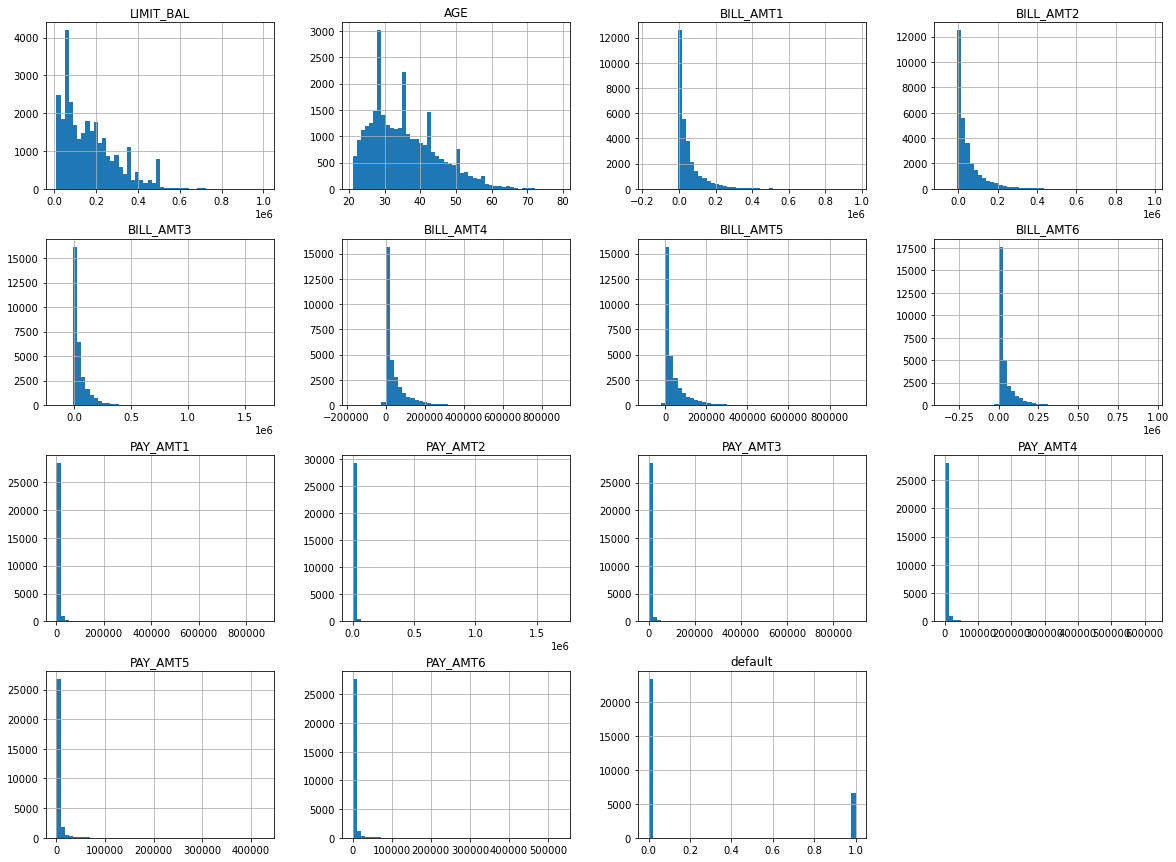

In [20]:
#HISTOGRAM
credit_card.hist(bins=50, figsize=(20, 15))
plt.show()

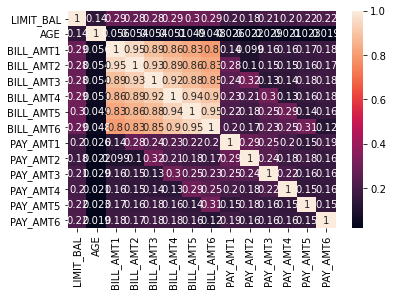

In [21]:
num_features=list(X_train_num)
corr_matrix = credit_card[num_features].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='EDUCATION', ylabel='default'>

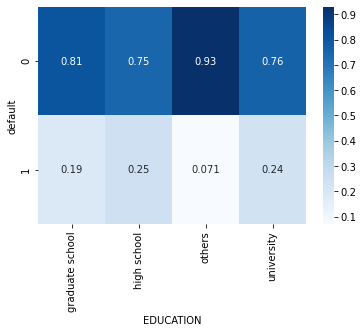

In [22]:
#create contingency table
cont_tbl=pd.crosstab(index=credit_card['default'], columns=credit_card['EDUCATION'], normalize='columns')
sn.heatmap(cont_tbl, annot=True, cmap='Blues')

In [23]:
credit_card1=credit_card.copy()

In [24]:
#categorical feature encoding
credit_card1 = pd.get_dummies(credit_card1, columns=["SEX"])
credit_card1 = pd.get_dummies(credit_card1, columns=["EDUCATION"])
credit_card1 = pd.get_dummies(credit_card1, columns=["MARRIAGE"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_0"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_2"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_3"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_4"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_5"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_6"])

In [25]:
credit_card1

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_duly,PAY_6_eight,PAY_6_five,PAY_6_four,PAY_6_neg2,PAY_6_seven,PAY_6_six,PAY_6_three,PAY_6_two,PAY_6_zero
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,1,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,0,0,0,0,0,1,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,0,0,1
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,0,0,0,0,1
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,0,0,0,0,0,0,0,1
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,0,0,0,0,0,0,0,1
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,0,0,0,0,0,0,0,1
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,...,1,0,0,0,0,0,0,0,0,0


In [26]:
credit_card1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   AGE                        30000 non-null  int64
 2   BILL_AMT1                  30000 non-null  int64
 3   BILL_AMT2                  30000 non-null  int64
 4   BILL_AMT3                  30000 non-null  int64
 5   BILL_AMT4                  30000 non-null  int64
 6   BILL_AMT5                  30000 non-null  int64
 7   BILL_AMT6                  30000 non-null  int64
 8   PAY_AMT1                   30000 non-null  int64
 9   PAY_AMT2                   30000 non-null  int64
 10  PAY_AMT3                   30000 non-null  int64
 11  PAY_AMT4                   30000 non-null  int64
 12  PAY_AMT5                   30000 non-null  int64
 13  PAY_AMT6                   30000 non-null  int64
 14  default               

In [27]:
#data normalisation
from sklearn import preprocessing as prep
minmax_scale = prep.MinMaxScaler().fit(credit_card1)
credit_minmax = minmax_scale.transform(credit_card1)
credit_minmax = pd.DataFrame(credit_minmax, columns = list(credit_card1))
credit_minmax

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_duly,PAY_6_eight,PAY_6_five,PAY_6_four,PAY_6_neg2,PAY_6_seven,PAY_6_six,PAY_6_three,PAY_6_two,PAY_6_zero
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29996,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29997,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29998,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X1 = credit_minmax.drop(["default"],axis=1)
y1 = credit_minmax["default"]

In [29]:
# Instantiate a SMOTE object
sm = SMOTE(random_state=42)

# Use SMOTE to resample the data
X_res, y_res = sm.fit_resample(X1, y1)

# Print the number of samples before and after SMOTE
print("Number of samples before SMOTE:", len(X))
print("Number of samples after SMOTE:", len(X_res))

Number of samples before SMOTE: 30000
Number of samples after SMOTE: 46728


In [30]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_res, y_res, test_size=0.2, random_state=30)

In [31]:
print("X1_train: ", X1_train.shape) 
print("y1_train: ", y1_train.shape) 
print("X1_test: ", X1_test.shape) 
print("y1_test: ", y1_test.shape) 

X1_train:  (37382, 87)
y1_train:  (37382,)
X1_test:  (9346, 87)
y1_test:  (9346,)


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [33]:
from sklearn.svm import SVC
##Linear Kernel SVM
# Train the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X1_train, y1_train)

# Make predictions on the testing set
y_pred = svm.predict(X1_test)

# Evaluate the model performance
print('Accuracy score:', accuracy_score(y1_test, y_pred))
print('Precision score:', precision_score(y1_test, y_pred))
print('Recall score:', recall_score(y1_test, y_pred))
print('F1 score:', f1_score(y1_test, y_pred))

Accuracy score: 0.6839289535630216
Precision score: 0.775438596491228
Recall score: 0.5193334757530442
F1 score: 0.6220573183213919


[[3961  704]
 [2250 2431]]
              precision    recall  f1-score   support

         0.0       0.64      0.85      0.73      4665
         1.0       0.78      0.52      0.62      4681

    accuracy                           0.68      9346
   macro avg       0.71      0.68      0.68      9346
weighted avg       0.71      0.68      0.68      9346



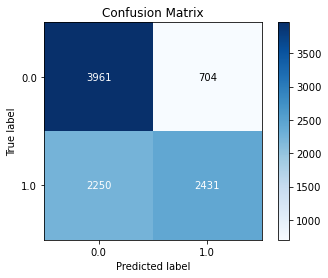

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

print(confusion_matrix(y1_test, y_pred))
print(classification_report(y1_test, y_pred))
skplt.metrics.plot_confusion_matrix(y1_test, y_pred)
plt.show()

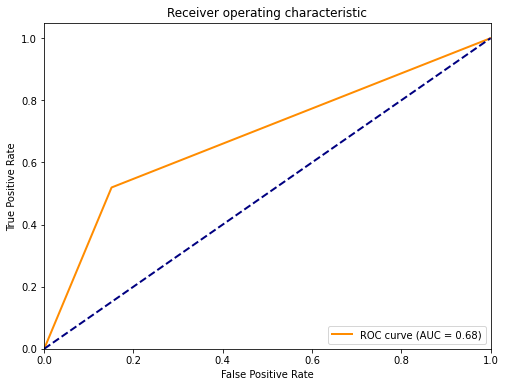

In [33]:
from sklearn.metrics import roc_curve, auc
# Suppose you have actual y_test values and predicted probabilities y_pred_proba
fpr, tpr, thresholds = roc_curve(y1_test, y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
##RBF Kernel SVM
# Train the SVM with RBF kernel
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = svm.predict(X1_test)

# Evaluate the model
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred)
recall = recall_score(y1_test, y1_pred)
f1 = f1_score(y1_test, y1_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.7312219131179114
Precision: 0.811548405630566
Recall: 0.6035035248878444
F1 Score: 0.6922322960058809


[[4009  656]
 [1856 2825]]
              precision    recall  f1-score   support

         0.0       0.68      0.86      0.76      4665
         1.0       0.81      0.60      0.69      4681

    accuracy                           0.73      9346
   macro avg       0.75      0.73      0.73      9346
weighted avg       0.75      0.73      0.73      9346



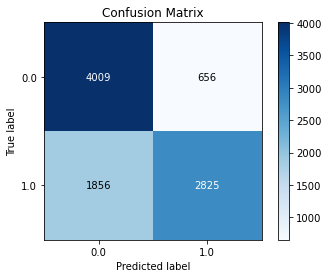

In [39]:
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
skplt.metrics.plot_confusion_matrix(y1_test, y1_pred)
plt.show()

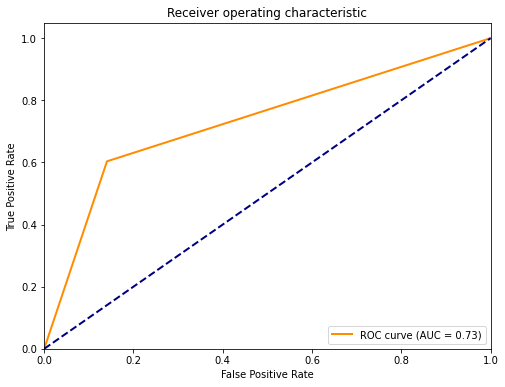

In [36]:
# Suppose you have actual y_test values and predicted probabilities y_pred_proba
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# Randomly sample 50% of the data
credit_card_sampled = credit_card1.sample(frac=0.2, random_state=42)

# Save the sample data to a new file
credit_card_sampled.to_csv("credit_card_clients.csv", index=False)

In [42]:
credit_card_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 2308 to 29171
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  6000 non-null   int64
 1   AGE                        6000 non-null   int64
 2   BILL_AMT1                  6000 non-null   int64
 3   BILL_AMT2                  6000 non-null   int64
 4   BILL_AMT3                  6000 non-null   int64
 5   BILL_AMT4                  6000 non-null   int64
 6   BILL_AMT5                  6000 non-null   int64
 7   BILL_AMT6                  6000 non-null   int64
 8   PAY_AMT1                   6000 non-null   int64
 9   PAY_AMT2                   6000 non-null   int64
 10  PAY_AMT3                   6000 non-null   int64
 11  PAY_AMT4                   6000 non-null   int64
 12  PAY_AMT5                   6000 non-null   int64
 13  PAY_AMT6                   6000 non-null   int64
 14  default             

In [43]:
#Check the empty columns
credit_card_sampled.isnull().sum()

LIMIT_BAL      0
AGE            0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
              ..
PAY_6_seven    0
PAY_6_six      0
PAY_6_three    0
PAY_6_two      0
PAY_6_zero     0
Length: 88, dtype: int64

In [44]:
#data normalisation
from sklearn import preprocessing as prep
sampled_minmax_scale = prep.MinMaxScaler().fit(credit_card_sampled)
credit_sampled_minmax = sampled_minmax_scale.transform(credit_card_sampled)
credit_sampled_minmax = pd.DataFrame(credit_sampled_minmax, columns = list(credit_card_sampled))
credit_sampled_minmax

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_duly,PAY_6_eight,PAY_6_five,PAY_6_four,PAY_6_neg2,PAY_6_seven,PAY_6_six,PAY_6_three,PAY_6_two,PAY_6_zero
0,0.025316,0.078431,0.034834,0.034455,0.033339,0.030358,0.136382,0.408722,0.004967,0.005195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.177215,0.098039,0.226418,0.203171,0.182410,0.154657,0.252670,0.480722,0.014854,0.011000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.075949,0.215686,0.126614,0.120599,0.114112,0.110206,0.238812,0.472590,0.008050,0.008083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.151899,0.549020,0.052534,0.047436,0.039851,0.036389,0.131877,0.399630,0.005331,0.004696,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.050633,0.294118,0.162730,0.089297,0.076995,0.040126,0.148331,0.414039,0.006623,0.003896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.443038,0.117647,0.021554,0.019768,0.018091,0.012789,0.113778,0.391829,0.000000,0.002156,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5996,0.620253,0.137255,0.169192,0.168726,0.175326,0.121822,0.253823,0.484929,0.019868,0.034160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5997,0.063291,0.137255,0.090822,0.088754,0.085980,0.083157,0.205998,0.452350,0.006954,0.006494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5998,0.012658,0.156863,0.021554,0.023408,0.022540,0.014694,0.112559,0.391623,0.008258,0.010304,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
Xs = credit_sampled_minmax.drop(["default"],axis=1)
ys = credit_sampled_minmax["default"]

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=30)

In [46]:
print("Xs_train: ", Xs_train.shape) 
print("ys_train: ", ys_train.shape) 
print("Xs_test: ", Xs_test.shape) 
print("ys_test: ", ys_test.shape) 

Xs_train:  (4800, 87)
ys_train:  (4800,)
Xs_test:  (1200, 87)
ys_test:  (1200,)


In [47]:
from sklearn.model_selection import GridSearchCV
#LINEAR parameter fine-tuning
# Train the SVM model
svm = SVC(kernel='linear', random_state=42)

# Define a range of hyperparameters to test
param_grid = {
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm, param_grid, scoring='f1', cv=5)
grid_search.fit(Xs_train, ys_train)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)



Best Parameters: {'C': 1, 'class_weight': 'balanced'}
Best Score: 0.5092454649369543


In [48]:
# Make predictions on the test set using the best model
best_svm = grid_search.best_estimator_
ys_pred = best_svm.predict(Xs_test)

# Evaluate the model
accuracy = accuracy_score(ys_test, ys_pred)
precision = precision_score(ys_test, ys_pred)
recall = recall_score(ys_test, ys_pred)
f1 = f1_score(ys_test, ys_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.7825
Precision: 0.48161764705882354
Recall: 0.5219123505976095
F1 Score: 0.5009560229445507


[[808 141]
 [120 131]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       949
         1.0       0.48      0.52      0.50       251

    accuracy                           0.78      1200
   macro avg       0.68      0.69      0.68      1200
weighted avg       0.79      0.78      0.79      1200



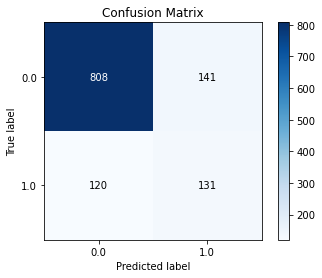

In [49]:
print(confusion_matrix(ys_test, ys_pred))
print(classification_report(ys_test, ys_pred))

skplt.metrics.plot_confusion_matrix(ys_test, ys_pred)
plt.show()

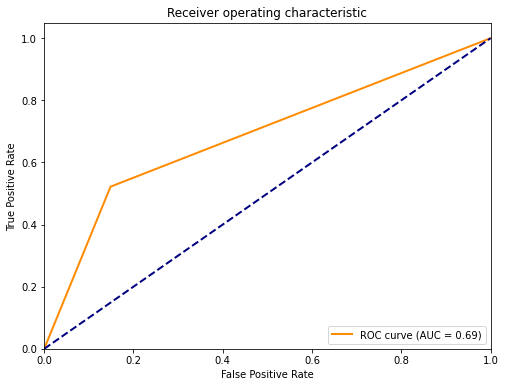

In [47]:
# Suppose you have actual y_test values and predicted probabilities y_pred_proba
fpr, tpr, thresholds = roc_curve(ys_test, ys_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [50]:
#RBF parameter fine-tuning
# Define the SVM model and parameter grid for grid search
svm = SVC(kernel='rbf', random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm, param_grid, scoring='f1', cv=5)
grid_search.fit(Xs_train, ys_train)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

# Make predictions on the test set using the best model
best_svm = grid_search.best_estimator_
ys2_pred = best_svm.predict(Xs_test)

# Evaluate the model
accuracy = accuracy_score(ys_test, ys2_pred)
precision = precision_score(ys_test, ys2_pred)
recall = recall_score(ys_test, ys2_pred)
f1 = f1_score(ys_test, ys2_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Best Parameters: {'C': 10, 'gamma': 0.01}
Best Score: 0.43757614523465804
Accuracy: 0.8225
Precision: 0.6979166666666666
Recall: 0.26693227091633465
F1 Score: 0.38616714697406335


[[920  29]
 [184  67]]
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90       949
         1.0       0.70      0.27      0.39       251

    accuracy                           0.82      1200
   macro avg       0.77      0.62      0.64      1200
weighted avg       0.81      0.82      0.79      1200



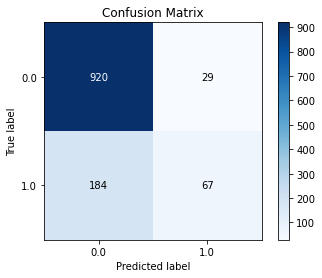

In [51]:
print(confusion_matrix(ys_test, ys2_pred))
print(classification_report(ys_test, ys2_pred))
skplt.metrics.plot_confusion_matrix(ys_test, ys2_pred)
plt.show()

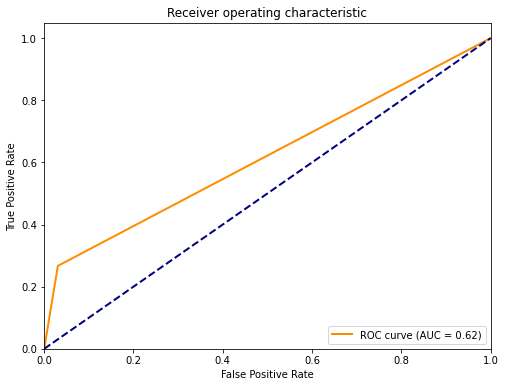

In [50]:
# Suppose you have actual y_test values and predicted probabilities y_pred_proba
fpr, tpr, thresholds = roc_curve(ys_test, ys2_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()